Fitted Parameters:
[ 5.12462344e+04 -7.62062157e+00  1.72996625e+00  1.01160562e+05
  2.68387703e+00  1.78087489e-01  2.90386906e+04  3.78053952e+00
  2.28199953e-01  3.16689396e+03  2.44698231e+00 -3.16727037e+00
  1.13111728e+04  1.94675099e+00  6.06235596e-01  8.62482648e+03
  2.59377227e+00  7.34954885e-02  4.35712266e+04  2.44027456e+00
  1.46458271e-01 -1.24617808e+05  2.61702775e+00  1.99042150e-01
 -2.80088410e+04  3.78648912e+00 -2.31078870e-01]


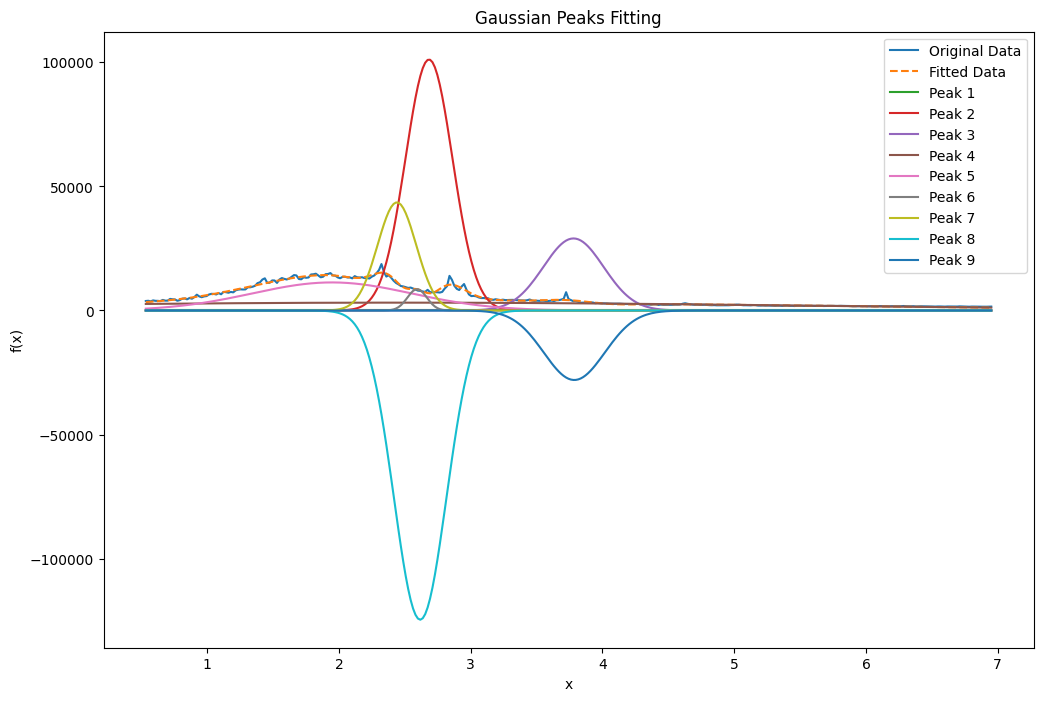

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 가우시안 함수 정의
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# 9개의 가우시안 피크를 합친 함수 정의
def nine_gaussians(params, x):
    assert len(params) == 27  # 파라미터 수 확인
    return sum(gaussian(x, params[i], params[i+1], params[i+2]) for i in range(0, len(params), 3))

# 손실 함수 정의
def loss(params, x, y):
    return np.sum((y - nine_gaussians(params, x)) ** 2)

# 엑셀 파일에서 데이터 읽기
file_path = r'D:\Users\doyeob\Desktop\gaussian fitting\input data\original.xlsx'
df = pd.read_excel(file_path)

# A열의 x 값과 B열의 f(x) 값 추출
x_data = df.iloc[:, 0].values
y_data = df.iloc[:, 1].values

# 대략적인 피크 위치로 초기 추정치 설정
initial_guesses = [
    max(y_data) * 0.6, 1.1, 0.1,  # 첫 번째 피크
    max(y_data) * 0.9, 2.3, 0.1,  # 두 번째 피크
    max(y_data) * 0.2, 3.4, 0.05,  # 세 번째 피크
    max(y_data) * 0.3, 2.9, 0.05,  # 네 번째 피크
    max(y_data) * 0.4, 1.4, 0.05,  # 다섯 번째 피크
    max(y_data) * 0.5, 2.38, 0.05, # 여섯 번째 피크
    max(y_data) * 0.6, 2.88, 0.05, # 일곱 번째 피크
    max(y_data) * 0.7, 2.95, 0.05, # 여덟 번째 피크
    max(y_data) * 0.8, 3.80, 0.05  # 아홉 번째 피크
]

# 최적화 함수로 데이터 피팅
result = minimize(loss, initial_guesses, args=(x_data, y_data), method='Nelder-Mead', options={'maxfev': 100000})

if result.success:
    params = result.x
    # 피팅된 파라미터 출력
    print('Fitted Parameters:')
    print(params)

    # 각 피크 개별 가우시안 계산
    peak1 = gaussian(x_data, params[0], params[1], params[2])
    peak2 = gaussian(x_data, params[3], params[4], params[5])
    peak3 = gaussian(x_data, params[6], params[7], params[8])
    peak4 = gaussian(x_data, params[9], params[10], params[11])
    peak5 = gaussian(x_data, params[12], params[13], params[14])
    peak6 = gaussian(x_data, params[15], params[16], params[17])
    peak7 = gaussian(x_data, params[18], params[19], params[20])
    peak8 = gaussian(x_data, params[21], params[22], params[23])
    peak9 = gaussian(x_data, params[24], params[25], params[26])

    # 전체 피팅 결과
    fitted_y_data = nine_gaussians(params, x_data)

    # 결과 시각화
    plt.figure(figsize=(12, 8))
    plt.plot(x_data, y_data, label='Original Data')
    plt.plot(x_data, fitted_y_data, label='Fitted Data', linestyle='--')
    plt.plot(x_data, peak1, label='Peak 1')
    plt.plot(x_data, peak2, label='Peak 2')
    plt.plot(x_data, peak3, label='Peak 3')
    plt.plot(x_data, peak4, label='Peak 4')
    plt.plot(x_data, peak5, label='Peak 5')
    plt.plot(x_data, peak6, label='Peak 6')
    plt.plot(x_data, peak7, label='Peak 7')
    plt.plot(x_data, peak8, label='Peak 8')
    plt.plot(x_data, peak9, label='Peak 9')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gaussian Peaks Fitting')
    plt.show()
else:
    print(f"Fit could not be performed: {result.message}")
